In [7]:
# install modules/packages

import sys
!{sys.executable} -m pip install -U pandas-profiling
!pip install widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

     -------------------------------------- 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 352.3/352.3 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 153.3/153.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.5.0
    Uninstalling pandas-profiling-3.5.0:
      Successfully uninstalled pandas-profiling-3.5.0
     ---------------------------------------- 2.1/2.1 MB 3.6 MB/s eta 0:00:00


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="../data/german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
# data_file="bank.arff"
# data_file="churn.arff"
data=arff.loadarff(data_file)
# print(data[0])
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    # making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
# Look at loaded data and data types
print(df.dtypes)

Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


In [4]:
df.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2
5,1,1,10.0,4,0,2241.0,1,2,1.0,3,...,3,1,48.0,3,1,2.0,2,2.0,1,2
6,1,1,8.0,4,0,3398.0,1,4,1.0,3,...,4,1,39.0,3,2,2.0,2,1.0,1,2
7,1,1,6.0,4,0,1361.0,1,2,2.0,3,...,4,1,40.0,3,2,1.0,2,2.0,1,2
8,1,4,18.0,4,3,1098.0,1,1,4.0,2,...,4,3,65.0,3,2,2.0,1,1.0,1,1
9,1,2,24.0,2,3,3758.0,3,1,1.0,2,...,4,4,23.0,3,1,1.0,1,1.0,1,1


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

c:\Users\Zhaokai\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
# find any missing values
# isnull() will check all rows from each column and return "TRUE" if the value is missing, vice versa.
# any() if there is one cell's value is NULL, the result will be "TRUE"
# https://note.nkmk.me/en/python-pandas-nan-judge-count/
df.isnull().any()

# index of class atrribute is 0 (Creditability) for German credit card

Creditability                        False
Account Balance                      False
Duration of Credit (month)           False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [ ]:
df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

num_attr=df.select_dtypes(include="float64")
result=[]
for i in num_attr:
   print(i)
   outliers = find_outliers_IQR(df[i])
   result.append(outliers)
   print("number of outliers: "+ str(len(outliers)))
   print("max outlier value: "+ str(outliers.max()))
   print("min outlier value: "+ str(outliers.min()))


Duration of Credit (month)
number of outliers: 70
max outlier value: 72.0
min outlier value: 45.0
Credit Amount
number of outliers: 72
max outlier value: 18424.0
min outlier value: 7966.0
Instalment per cent
number of outliers: 0
max outlier value: nan
min outlier value: nan
Age (years)
number of outliers: 23
max outlier value: 75.0
min outlier value: 65.0
No of Credits at this Bank
number of outliers: 6
max outlier value: 4.0
min outlier value: 4.0
No of dependents
number of outliers: 155
max outlier value: 2.0
min outlier value: 2.0


<AxesSubplot:>

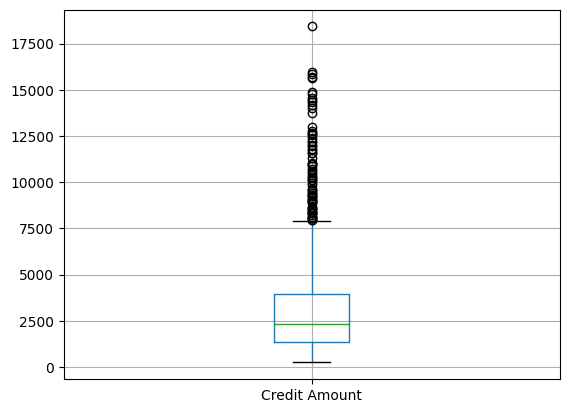

In [ ]:
df.boxplot(column=['Credit Amount'])

In [9]:
print(df.corr(method='spearman',numeric_only=False))

                                   Creditability  Account Balance  \
Creditability                           1.000000         0.347944   
Account Balance                         0.347944         1.000000   
Duration of Credit (month)             -0.205685        -0.062703   
Payment Status of Previous Credit       0.221606         0.190632   
Purpose                                 0.020900         0.067842   
Credit Amount                          -0.087083        -0.016577   
Value Savings/Stocks                    0.175198         0.242742   
Length of current employment            0.119806         0.099142   
Instalment per cent                    -0.073690        -0.011597   
Sex & Marital Status                    0.090510         0.043597   
Guarantors                              0.003197        -0.120907   
Duration in Current address            -0.002553        -0.048577   
Most valuable available asset          -0.140851        -0.027092   
Age (years)                       

210     4.0
238     4.0
537     4.0
536     4.0
530     4.0
       ... 
690    60.0
241    60.0
455    60.0
847    60.0
719    72.0
Name: Duration of Credit (month), Length: 1000, dtype: float64

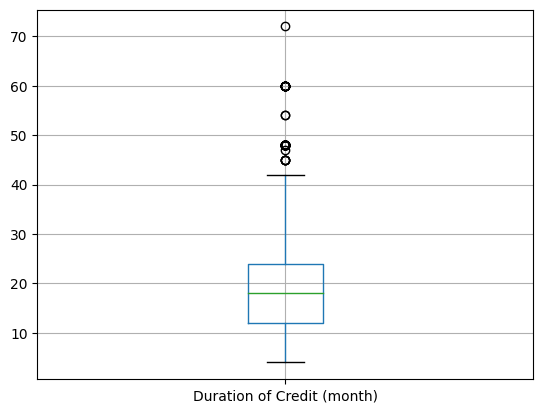

In [ ]:
# Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers. 
# df.boxplot(column=['Credit Amount'])
df.boxplot(column=['Duration of Credit (month)'])
dup = pd.DataFrame(df)
dup.sort_values(by='Duration of Credit (month)')['Duration of Credit (month)']




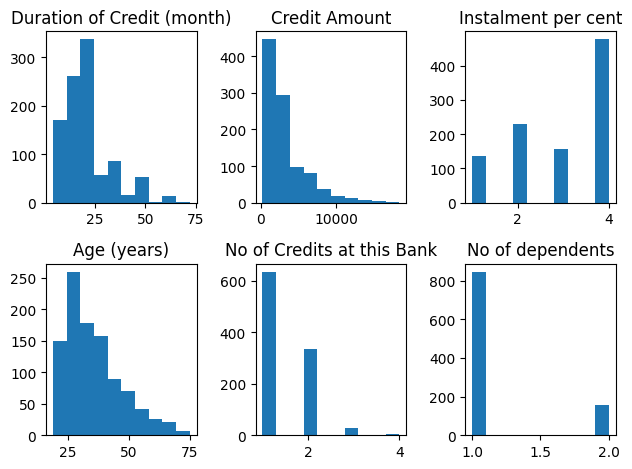

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ((ax0, ax1,ax2), (ax3,ax4,ax5)) = plt.subplots(nrows=2, ncols=3)
 
ax0.hist(df['Duration of Credit (month)'])
ax0.set_title('Duration of Credit (month)')
 
ax1.hist(df['Credit Amount'])
ax1.set_title('Credit Amount')

ax2.hist(df['Instalment per cent'])
ax2.set_title('Instalment per cent')
 
ax3.hist(df['Age (years)'])
ax3.set_title('Age (years)')
 
ax4.hist(df['No of Credits at this Bank'])
ax4.set_title('No of Credits at this Bank')
 
ax5.hist(df['No of dependents'])
ax5.set_title('No of dependents')
 
fig.tight_layout()
plt.show()

In [ ]:
from scipy import stats

x = df['Creditability'].astype('int64')
y = df.select_dtypes(include=['float64'])
result=[]
for i in y:
    print(i)
    result.append(stats.pointbiserialr(x,df[i]))
print(result)


Duration of Credit (month)
Credit Amount
Instalment per cent
Age (years)
No of Credits at this Bank
No of dependents
[PointbiserialrResult(correlation=-0.21492666544189076, pvalue=6.488049877184295e-12), PointbiserialrResult(correlation=-0.1547401455528128, pvalue=8.795399017201395e-07), PointbiserialrResult(correlation=-0.07240393725133035, pvalue=0.02203548630695123), PointbiserialrResult(correlation=0.09127194878302196, pvalue=0.0038684552813061887), PointbiserialrResult(correlation=0.04573248933920641, pvalue=0.14841978608044315), PointbiserialrResult(correlation=0.0030148530833447275, pvalue=0.9241408780993469)]


In [ ]:
import seaborn as sea
import matplotlib.pylab as plt
result = df.corr(method='spearman',numeric_only=False).round(4)
ax = sea.heatmap(result,linecolor='#d8dcd6',linewidth = 3,vmax=1,vmin=-0.5,cmap='icefire')
plt.show()
result

NameError: name 'df' is not defined

In [ ]:
#baseline
https://mljar.com/machine-learning/baseline-vs-decision-tree/

In [ ]:
# First split the data into train and test set
# ! pip install sklearn

# 3 Attributes removed: Guarantors, No of dependants, Duration in Current address
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name]
new_features = feature_names.drop(['Guarantors','Duration in Current address', 'No of dependents'])
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, new_features], df[class_col_name], test_size=0.3,random_state=1) 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [ ]:
help(tree.DecisionTreeClassifier)

class Names ['1' '0']


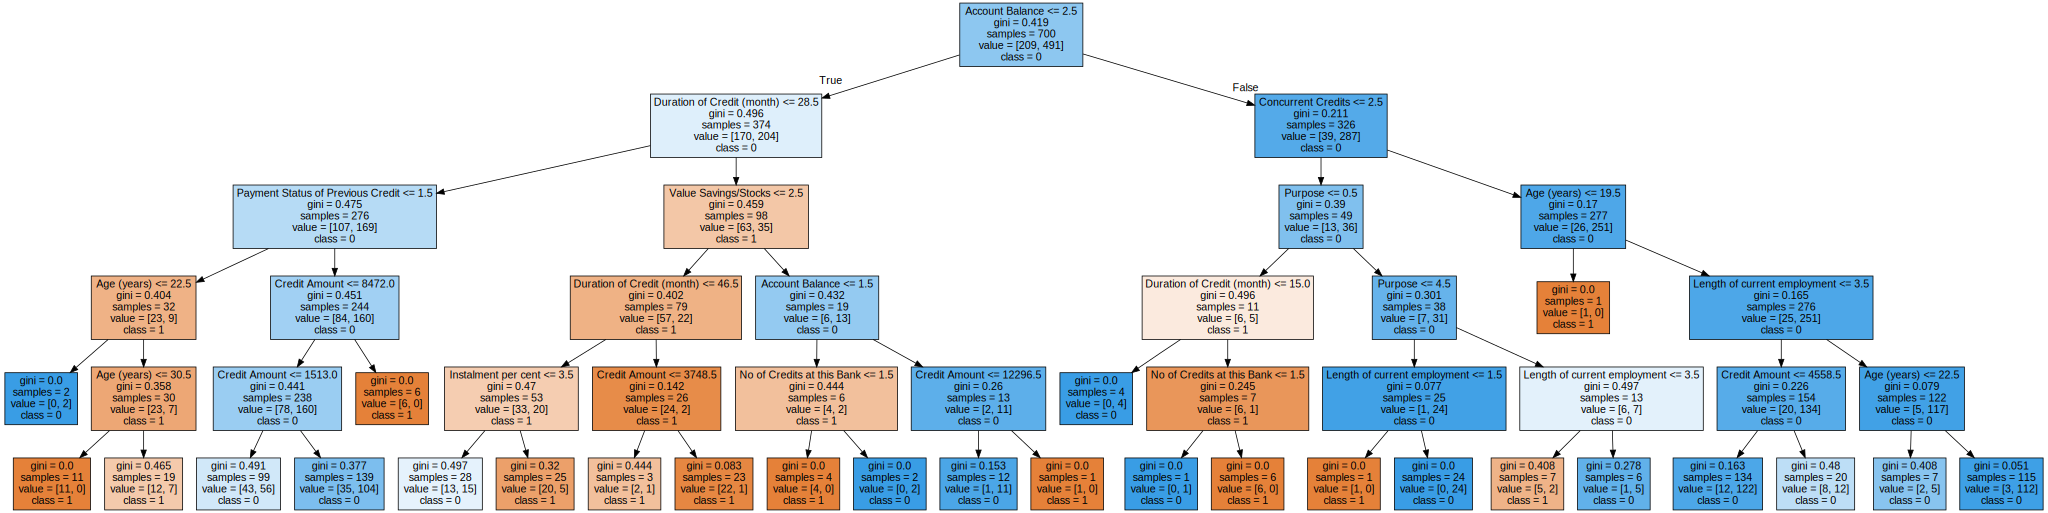

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=new_features,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



In [ ]:
# 5 Attributes removed: Guarantors, No of dependents, Duration in Current address, Type of apartment,  Purpose,

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name]
new_features = feature_names.drop(['Guarantors','Duration in Current address', 'No of dependents','Type of apartment', 'Purpose'])
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, new_features], df[class_col_name], test_size=0.3,random_state=1)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


class Names ['1' '0']


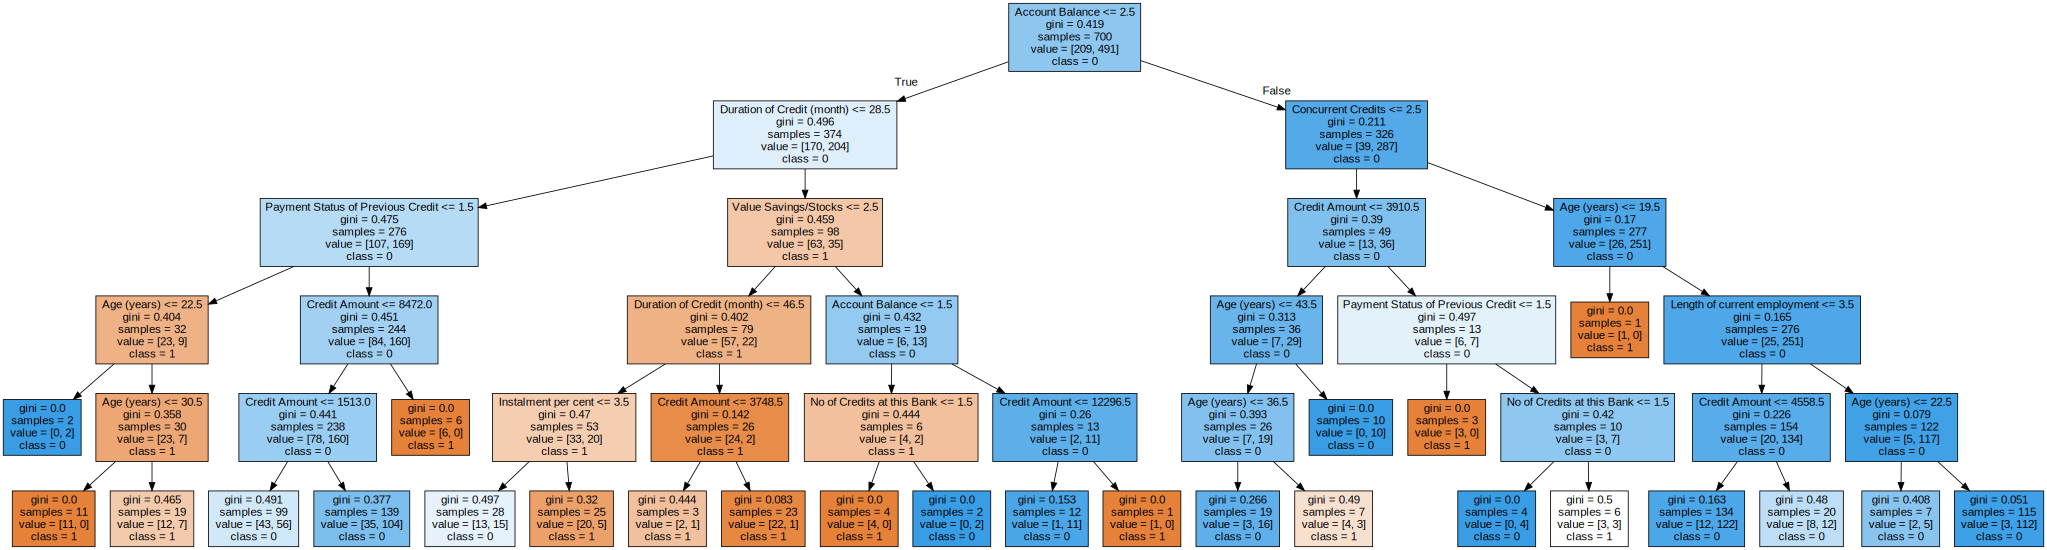

In [ ]:
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=new_features,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [ 12 197]]
TP:  197 , FP:  62 , TN:  29 , FN: 12


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.32      0.44        91
           1       0.76      0.94      0.84       209

    accuracy                           0.75       300
   macro avg       0.73      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300



In [ ]:
# train, test 80%, 20%
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name]
new_features = feature_names.drop(['Guarantors','Duration in Current address', 'No of dependents'])

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, new_features], df[class_col_name], test_size=0.2,random_state=1) 
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [ ]:
y_pred = clf.predict(X_test)
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 16  40]
 [ 18 126]]
TP:  126 , FP:  40 , TN:  16 , FN: 18


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.29      0.36        56
           1       0.76      0.88      0.81       144

    accuracy                           0.71       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.68      0.71      0.68       200



In [ ]:
# Naive Bayes

# 3 Attributes removed: Guarantors, No of dependants, Duration in Current address

from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  17
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.65927421 -5.09162944 -7.52793821 -7.24300717 -0.02259223 -7.77049985
  -7.1666585  -7.18209091 -7.34196034 -7.36037707 -4.77155146 -7.37347361
  -7.65927421 -7.98527515 -7.22987069 -7.97491236 -8.28225962]
 [-6.9621473  -5.0885153  -7.03099013 -7.02426113 -0.02928002 -7.19355319
  -6.79547036 -6.95725732 -7.02277193 -7.21496346 -4.44158605 -7.0264991
  -7.36446611 -7.65809954 -6.96284783 -7.68659149 -7.98007068]]


c:\Users\Zhaokai\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.64      0.63      0.63       300



In [ ]:
# 5 Attributes removed: Guarantors, No of dependents, Duration in Current address, Type of apartment,  Purpose,

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print(classification_report(y_test, y_pred))

Number of features used  15
Classes  ['0' '1']
Number of records for classes  [209. 491.]
              precision    recall  f1-score   support

           0       0.40      0.43      0.41        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.57      0.58      0.57       300
weighted avg       0.64      0.63      0.64       300



c:\Users\Zhaokai\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
